In [1]:
import lammps_logfile
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
log = lammps_logfile.File("./log_task2.lammps")

T = log.get("Temp")[1:]
P = log.get("Press")[1:]
E = log.get("TotEng")[1:]

rho = 0.001

slope_TP = stats.linregress(T, P)[0]
slope_TP_std = stats.linregress(T, P)[4]
print("z=", slope_TP/rho)
print("Stadard deviation of z=", slope_TP_std/rho)
slope_UT = stats.linregress(T, E)[0]
slope_UT_std = stats.linregress(T, E)[4]
print("Standard deviation of C_v=", slope_UT_std)
print("C_v=", slope_UT, "<", slope_UT-slope_UT_std, "=C_v -dC_v")
print("f=", 2*slope_UT) #N=1, k=1

z= 1.0020021323283907
Stadard deviation of z= 0.001635061627016995
Standard deviation of C_v= 0.000563251570429134
C_v= 1.5083980484063437 < 1.5078347968359147 =C_v -dC_v
f= 3.0167960968126875


z= 1.000192641501024
Stadard deviation of z= [3.87362502e-04 1.29120834e-04 4.84203127e-05 2.97971155e-05
 1.84458334e-05 7.59534317e-06 3.22802085e-06 1.29120834e-06
 4.50421513e-07]
Standard deviation of C_v= 8.194478942847307e-05
C_v= 1.4985690341180655 < 1.498487089328637 =C_v -dC_v
f= 2.997138068236131


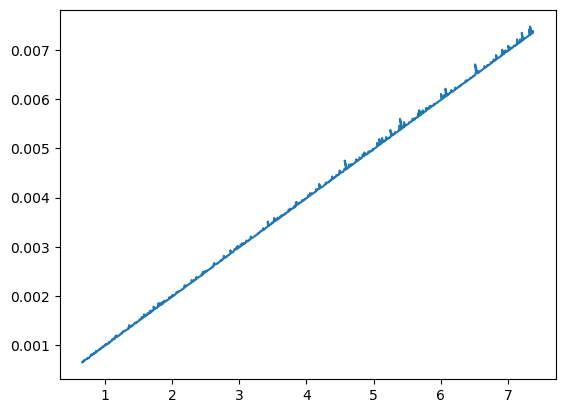

In [7]:
log = lammps_logfile.File("./log_task4.lammps")

T = log.get("Temp")[1:]
P = log.get("Press")[1:]
E = log.get("TotEng")[1:]

rho1 = 0.001

slope_TP = stats.linregress(T, P)[0]
slope_TP_std = stats.linregress(T, P)[4]
print("z=", slope_TP/rho1)
print("Stadard deviation of z=", slope_TP_std/rho)
slope_UT = stats.linregress(T, E)[0]
slope_UT_std = stats.linregress(T, E)[4]
print("Standard deviation of C_v=", slope_UT_std)
print("C_v=", slope_UT, "<", slope_UT-slope_UT_std, "=C_v -dC_v")
print("f=", 2*slope_UT) #N=1, k=1
plt.plot(T, P)

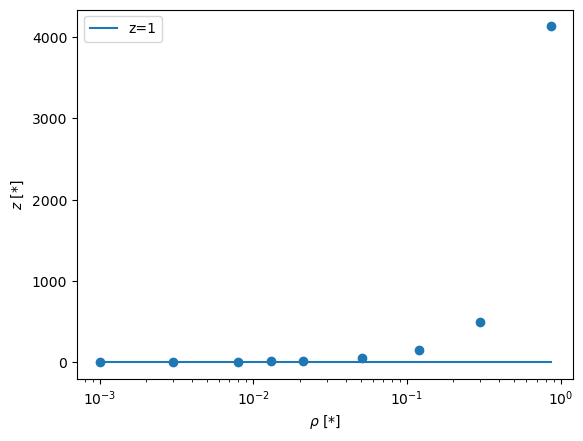

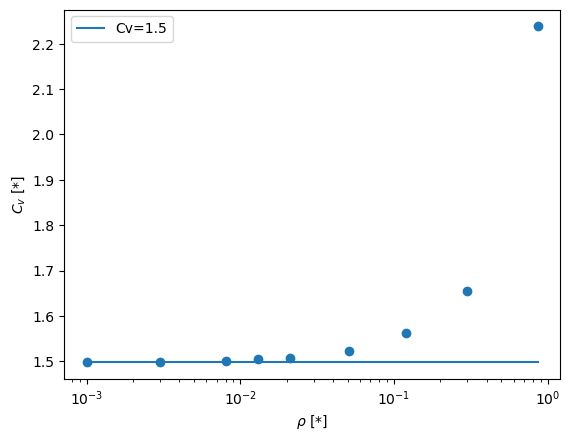

In [17]:
log = []
slope_TP_list = np.zeros(9)
slope_UT_list = np.zeros(9)
rho = [0.001, 0.003, 0.008, 0.013, 0.021, 0.051, 0.12, 0.3, 0.86]
for i in range(9):
    log.append(lammps_logfile.File(f"./log_task5_{i+1}.lammps"))
    T = log[i].get("Temp")[1:]
    P = log[i].get("Press")[1:]
    E = log[i].get("TotEng")[1:]
    slope_TP_list[i] = stats.linregress(T, P)[0]
    slope_UT_list[i] = stats.linregress(T, E)[0]
    
fig = plt.figure()
ax = plt.gca()
ax.scatter(rho, slope_TP_list/rho1)
ax.plot(rho, np.zeros(len(rho))+slope_TP/rho1, label="z=1")
ax.set_xscale('log')
ax.set_xlabel(r"$\rho$ [*]")
ax.set_ylabel(r"$z$ [*]")
ax.legend()
plt.show()
fig = plt.figure()
ax = plt.gca()
ax.scatter(rho, slope_UT_list)
ax.plot(rho, np.zeros(len(rho))+slope_UT, label="Cv=1.5")
ax.set_xscale('log')
ax.set_xlabel(r"$\rho$ [*]")
ax.set_ylabel(r"$C_v$ [*]")
ax.legend()